<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-the-libraries" data-toc-modified-id="Load-the-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load the libraries</a></span></li><li><span><a href="#Image-with-rocks/no-sand" data-toc-modified-id="Image-with-rocks/no-sand-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Image with rocks/no sand</a></span><ul class="toc-item"><li><span><a href="#Getting-the-image" data-toc-modified-id="Getting-the-image-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Getting the image</a></span></li><li><span><a href="#Extracting-the-indexes-of-rocks" data-toc-modified-id="Extracting-the-indexes-of-rocks-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Extracting the indexes of rocks</a></span></li></ul></li><li><span><a href="#Erode-and-dilate-the-image" data-toc-modified-id="Erode-and-dilate-the-image-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Erode and dilate the image</a></span></li><li><span><a href="#Edge-detection" data-toc-modified-id="Edge-detection-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Edge detection</a></span></li></ul></div>

# Load the libraries

In [69]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

# Image with rocks/no sand

Take all the pixels belonging to sand and assign black color [0,0,0] to it. What we get as a result is ann image with only rocks 

## Getting the image

threshold value 147


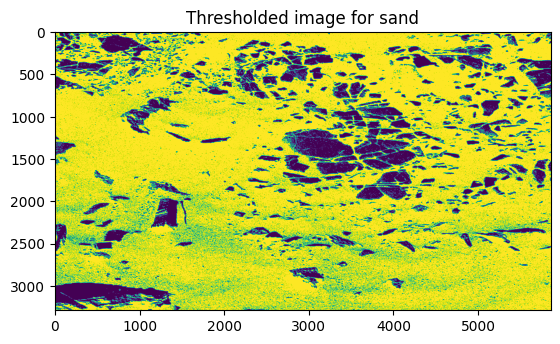

[[ True  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


In [70]:
image = cv2.imread("images/cv_test_images_1.png")
img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

from skimage.filters import threshold_otsu

threshold = threshold_otsu(img)
print("threshold value",threshold)
#Generate thresholded image
thresholded_img = img < threshold
plt.imshow(thresholded_img)
plt.title("Thresholded image for sand")
plt.show()
print(thresholded_img)

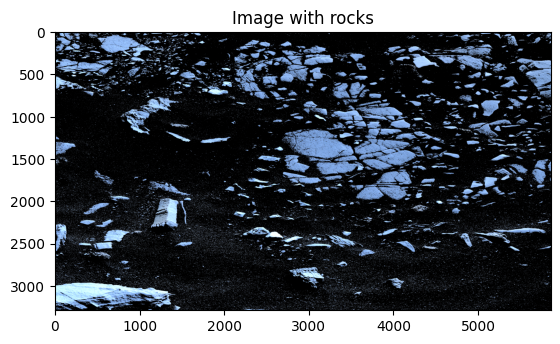

In [71]:
processed_image = image.copy()
for i in range(thresholded_img.shape[0]):
    for j in range(thresholded_img.shape[1]):
        if thresholded_img[i][j] == True:
            processed_image[i][j] = [0, 0, 0]
plt.imshow(processed_image)
plt.title("Image with rocks")
plt.show()

## Extracting the indexes of rocks

extracted the position row and col of the pixels of rocks and stored it in a list

In [4]:
rock_indexes = []
for i in range(thresholded_img.shape[0]):
    for j in range(thresholded_img.shape[1]):
        if thresholded_img[i][j] == False:
            rock_indexes.append((i,j))
print(rock_indexes[0:5])
print(len(rock_indexes))

[(0, 13), (0, 14), (0, 15), (0, 16), (0, 17)]
3994759


# Erode and dilate the image

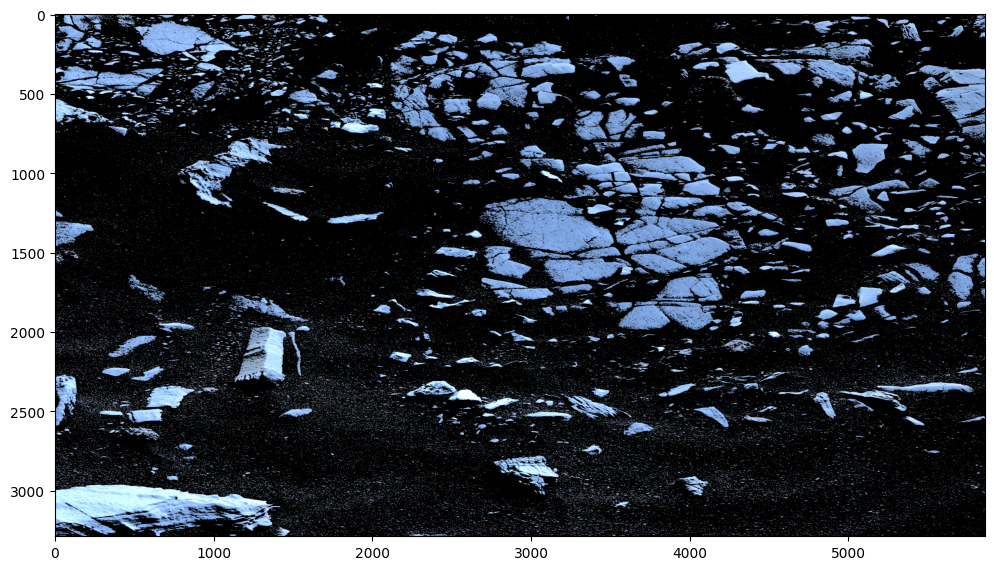

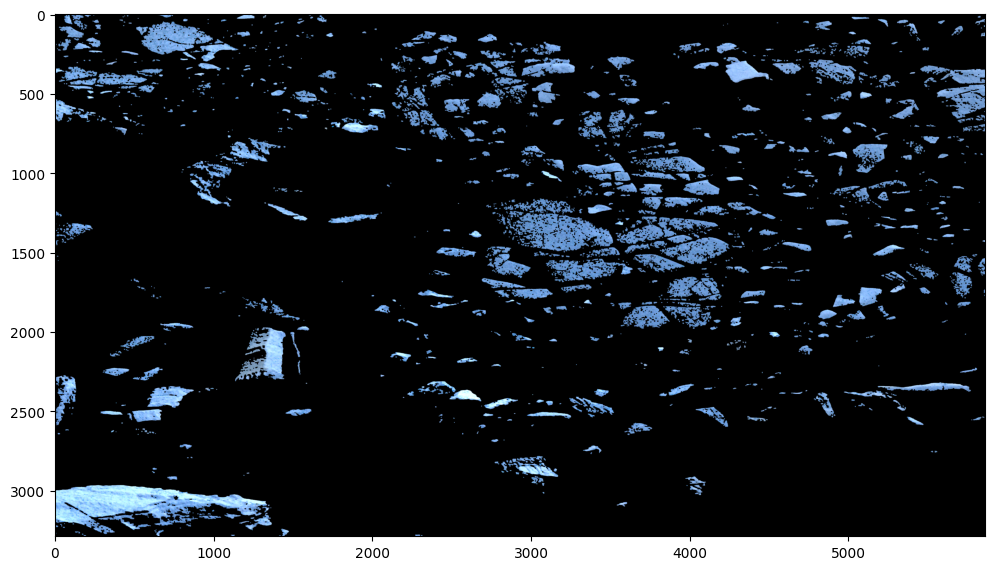

In [72]:
rock_image = processed_image.copy()

# Create the erosion kernel
kernel = np.ones((5,5), np.uint8)
plt.figure(figsize=(12,10))
plt.imshow(processed_image)
plt.show()

# Erode the image
eroded = cv2.erode(rock_image, kernel, iterations=2)
# Dilate the image
dilated = cv2.dilate(eroded,kernel, iterations=1)

plt.figure(figsize=(12,10))
plt.imshow(dilated)
plt.show()



# Edge detection

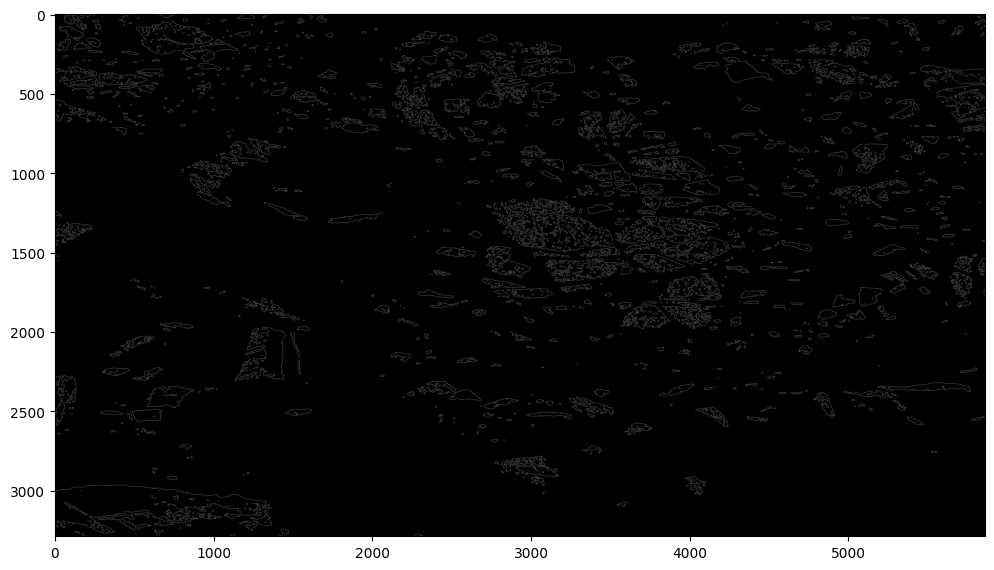

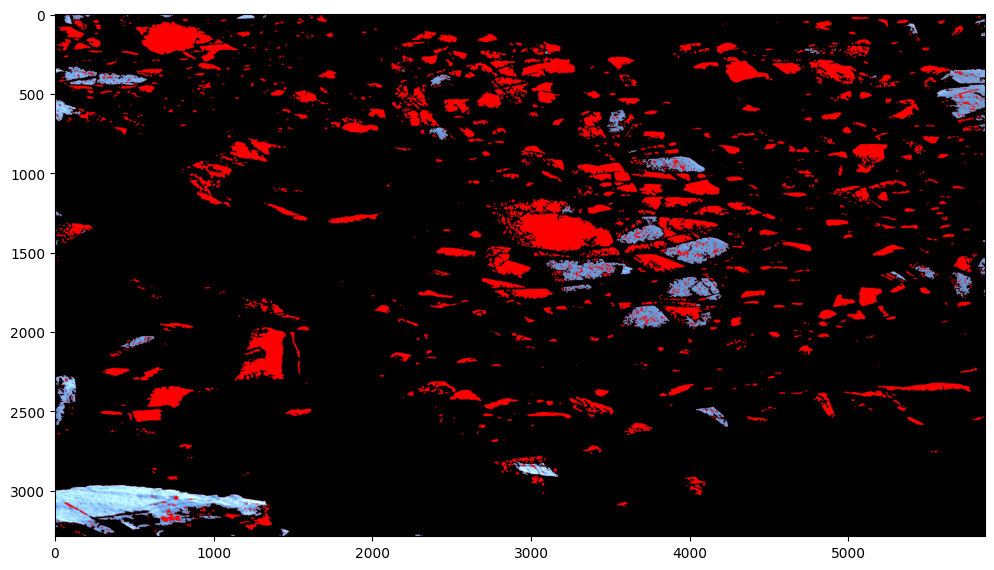

In [77]:
image_edges = dilated.copy()

# plt.figure(figsize=(12,10))
# Convert the image to grayscale
gray = cv2.cvtColor(image_edges, cv2.COLOR_BGR2GRAY)

# Blur the image to reduce noise
# gray = cv2.GaussianBlur(gray, (3,3), 0)

# Define parameters for the Canny edge detector
low_threshold = 200
high_threshold = 300

# Detect edges using the Canny edge detector
edges = cv2.Canny(gray, low_threshold, high_threshold)

plt.figure(figsize=(12,10))
plt.imshow(edges, cmap="gray")
plt.show()
plt.imsave("results/edge_detection/segmented_rocks.jpg", edges) 

# Find contours in the image
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Iterate through the contours and draw and fill them with the desired color
for contour in contours:
    cv2.drawContours(image_edges, [contour], 0, (255,0,0), -1)
#     cv2.drawContours(image_edges, [contour], 0, (random.randint(0,255),random.randint(0,255),random.randint(0,255)), -1)

plt.figure(figsize=(12,10))
plt.imshow(image_edges)
plt.show()
plt.imsave("results/edge_detection/contours_filled.jpg", image_edges) 